<a href="https://colab.research.google.com/github/tvinente/imersao-dados-CDS/blob/main/CDS_Aula_03_Treinamento_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento da Árvore de Decisão

## Passo 01: Coleta dos dados
## Passo 02: Limpeza e Tratamento dos dados
## Passo 03: Treinamento da Inteligência Artificial
## Passo 04: Código completo de coleta, tratamento e treinamento da IA

In [15]:
# Passo 01:

import sqlite3
import pandas as pd

conn = sqlite3.connect('database.db')

consulta_atividade = """
  SELECT *
  FROM
      flight_activity fa
      LEFT JOIN flight_loyalty_history flh
      ON (fa.loyalty_number = flh.loyalty_number)
"""

df_atividade = pd.read_sql_query(consulta_atividade, conn)

In [ ]:
# Passo 02:
# Comando para mostrar a tabela resultante da consulta
df_atividade.head()

# Selecionar as linhas que contém apenas dados numéricos
colunas = ['year', 'month', 'flights_booked', 'flights_with_companions',
           'total_flights', 'distance', 'points_accumulated', 'salary',
           'clv', 'loyalty_card']

df_colunas_selecionadas = df_atividade.loc[:, colunas]

# Remover todas as linhas que contém alguma coluna com
# dados faltantes
df_treinamento = df_colunas_selecionadas.dropna()

# Verificar se os dados não tem dados faltantes (na = não aplicável)
df_treinamento.isna().sum()

,0
year,0
month,0
flights_booked,0
flights_with_companions,0
total_flights,0
distance,0
points_accumulated,0
salary,0
clv,0
loyalty_card,0


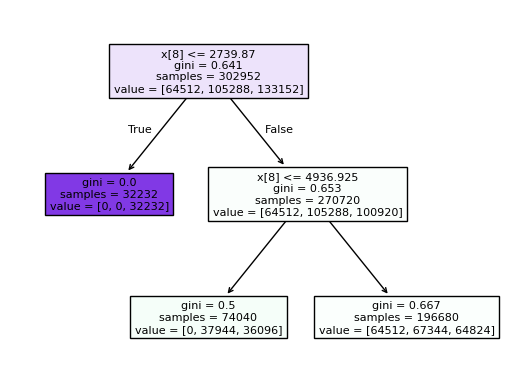

In [ ]:
# Passo 03:

from sklearn import tree as tr

x = df_treinamento.drop(columns='loyalty_card')
y = df_treinamento.loc[:, 'loyalty_card']

# Comando: Defina o algoritmo Decision Tree
modelo = tr.DecisionTreeClassifier(max_depth=2)

# Comando: Treine o algoritmo Decision Tree
modelo_treinado = modelo.fit(x, y)

tr.plot_tree(modelo_treinado, filled=True);

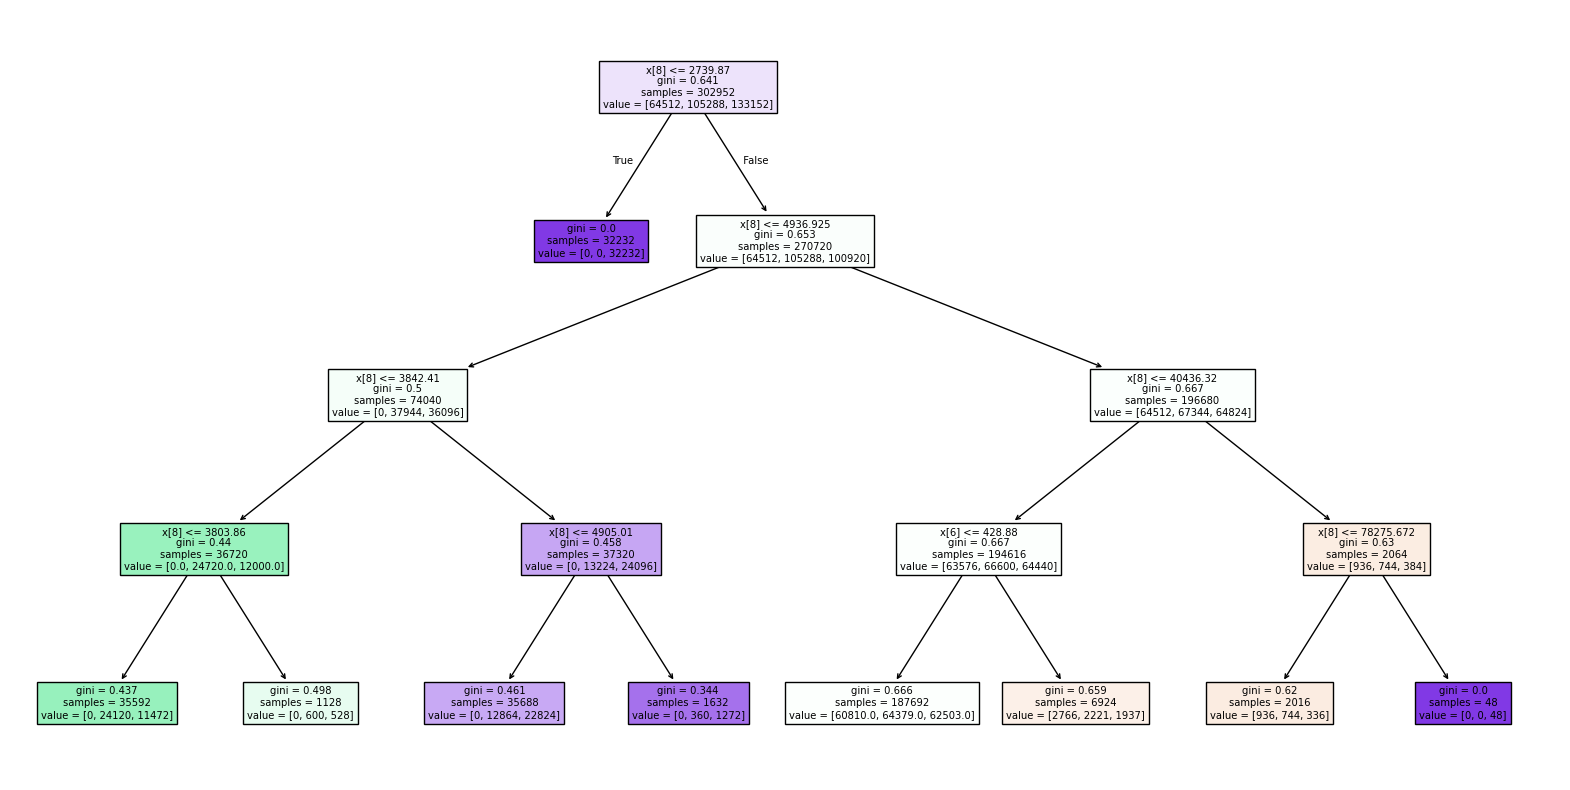

Prob - Aurora: 32.4% - Nova: 34.3% - Star: 33.3%


/usr/local/lib/python3.10/dist-packages/gradio/interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e87a3ff3b74193c607.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [38]:
# Passo 04:

!pip install --upgrade pip
!pip install python-multipart
!pip install gradio

import sqlite3
import pandas as pd
import gradio as gr
import numpy as np
from sklearn import tree as tr
from matplotlib import pyplot as plt
%matplotlib inline

conn = sqlite3.connect('database.db')

consulta_atividade = """
  SELECT *
  FROM
      flight_activity fa
      LEFT JOIN flight_loyalty_history flh
      ON (fa.loyalty_number = flh.loyalty_number)
"""

df_atividade = pd.read_sql_query(consulta_atividade, conn )
df_atividade.head()
df_atividade.isna().sum()

colunas = ['year', 'month', 'flights_booked', 'flights_with_companions',
           'total_flights', 'distance', 'points_accumulated', 'salary',
           'clv', 'loyalty_card']

df_colunas_numericas = df_atividade.loc[:, colunas]
df_dados_completos = df_colunas_numericas.dropna()
df_dados_completos.isna().sum()

x_atributos = df_dados_completos.drop(columns= 'loyalty_card')
y_rotulos = df_dados_completos.loc[:, 'loyalty_card']

# Definicao do algoritmo
modelo = tr.DecisionTreeClassifier(max_depth=4)

# Treinamento do algoritmo
modelo_treinado = modelo.fit(x_atributos, y_rotulos)

# Algoritmo treinado
plt.figure(figsize=(20 ,10)) # Ajusta o tamanho da imagem
tr.plot_tree(modelo_treinado, filled=True);
plt.show()

# Previsão para um novo cliente
x_novo = x_atributos.sample()
previsao = modelo_treinado.predict_proba(x_novo)

print('Prob - Aurora: {:.1f}% - Nova: {:.1f}% - Star: {:.1f}%'.format(
    100 * previsao[0][0], 100 * previsao[0][1], 100 * previsao[0][2])
)

# Painel online para mostrar o resultado

def predict(*args):
  x_novo = np.array([args]).reshape(1, -1)
  previsao = modelo_treinado.predict_proba(x_novo)

  return {'Aurora': previsao[0][0], 'Nova': previsao[0][1],
          'Star': previsao[0][2]}

demo = gr.Interface(
        title= 'Projeto 01: Imersão na área de Dados',
    description= '**Inteligência Artificial para calcular propensão de compra de clientes**  \n\n*Utilize os sliders para ajustar os valores de entrada.*',
    fn = predict,
    inputs = [
        gr.Radio([2017,2018], label = 'year'),
        gr.Slider(label='month',
                  minimum=1, maximum=12, step=1,
                  randomize=True ),
        gr.Slider(label='flights_booked',
                  minimum=0, maximum=21, step=1,
                  randomize=True ),
        gr.Slider(label='flights_with_companions',
                  minimum=0, maximum=11, step=1,
                  randomize=True ),
        gr.Slider(label='total_flights',
                  minimum=0, maximum=32, step=1,
                  randomize=True ),
        gr.Slider(label='distance',
                  minimum=0, maximum=6293, step=1,
                  randomize=True ),
        gr.Slider(label='points_accumulated',
                  minimum=0.00, maximum=676.50, step=0.1,
                  randomize=True ),
        gr.Slider(label='salary',
                  minimum=-58486.00, maximum=407228.00, step=0.1,
                  randomize=True ),
        gr.Slider( label='clv',
                  minimum=2119.89, maximum=83325.38, step=0.1,
                  randomize=True )
    ],

    outputs = [gr.Label(label= 'Previsao')],
    allow_flagging= 'never'
)

demo.launch(share=True)